# 1. Language Processing and Python

# 1   Computing with Language: Texts and Words

1.1   Getting Started with Python

1.2   Getting Started with NLTK

In [1]:
import nltk

In [2]:
nltk .__version__


'3.8.1'

In [ ]:
nltk.download()

In [ ]:
from nltk.book import *

In [ ]:
text2

# 1.3   Searching Text

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing "monstrous" in parentheses:

In [ ]:
text1.concordance("monstrous")
# it allows you to see all occurrences of a particular word along with the surrounding context

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size . What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [ ]:
text2.similar("monstrous")
#  finds words that appear in a similar context to the word "monstrous" in the specified text (text1).

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:



In [ ]:
text2.common_contexts(["monstrous", "very"])
# finds and displays the contexts where the words "monstrous" and "very" are used in a similar way in the specified text (text2). 
# The output will provide phrases or contexts where both words co-occur.

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. 


In the following figure we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [ ]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
# The plot can provide insights into how the use of these words is distributed across the text.

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate. (We need to include the parentheses, but there's nothing that goes between them.)

In [ ]:
text3.generate()

# 1.4   Counting Vocabulary

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [ ]:
len(text4)

A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. 

The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of text3 with the command: set(text3). 


By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]

In [ ]:
print(text4)

In [ ]:
sorted(set(text3))

In [ ]:
len(set(text3))

In [ ]:
len(text3)

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average.

In [ ]:
len(set(text3)) / len(text3)
# the number of distinct words is just 6% of the total number of words

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [ ]:
text3.count("smote")

In [ ]:
100 * text4.count('a') / len(text4)

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. 

Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a function, and we define a short name for our function with the keyword def. The next example shows how to define two new functions, lexical_diversity() and percentage():


In the definition of lexical_diversity() [1], we specify a parameter named text . This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used [2]. Similarly, percentage() is defined to take two parameters, named count and total [3].

Once Python knows that lexical_diversity() and percentage() are the names for specific blocks of code, we can go ahead and use these functions:

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 

In [ ]:
def percentage(count, total): 
    return 100 * count / total

In [ ]:
lexical_diversity(text3)

In [ ]:
lexical_diversity(text5)

In [ ]:
percentage(4, 5)

In [ ]:
percentage(text4.count('a'), len(text4))

# 2   A Closer Look at Python: Texts as Lists of Words

# 2.1   Lists

What is a text? At one level, it is a sequence of symbols on a page such as this one. At another level, it is a sequence of chapters, made up of a sequence of sections, where each section is a sequence of paragraphs, and so on. However, for our purposes, we will think of a text as nothing more than a sequence of words and punctuation. Here's how we represent text in Python, in this case the opening sentence of Moby Dick:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']


After the prompt we've given a name we made up, sent1, followed by the equals sign, and then some quoted words, separated with commas, and surrounded with brackets. This bracketed material is known as a list in Python: it is how we store a text. We can inspect it by typing the name [1]. We can ask for its length [2]. We can even apply our own lexical_diversity() function to it [3].

In [ ]:
 sent1

In [ ]:
len(sent1)

In [ ]:
lexical_diversity(sent1)

In [ ]:
from nltk.book import *

In [ ]:
sent2

In [ ]:
sent3

A pleasant surprise is that we can use Python's addition operator on lists. Adding two lists [1] creates a new list with everything from the first list, followed by everything from the second list:

In [ ]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

We don't have to literally type the lists either; we can use short names that refer to pre-defined lists.

In [ ]:
sent4 + sent1

In [ ]:
sent1.append("Some")
sent1

# 2.2   Indexing Lists
As we have seen, a text in Python is a list of words, represented using a combination of brackets and quotes. Just as with an ordinary page of text, we can count up the total number of words in text1 with len(text1), and count the occurrences in a text of a particular word — say, 'heaven' — using text1.count('heaven').

With some patience, we can pick out the 1st, 173rd, or even 14,278th word in a printed text. Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's index. We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the name of the text followed by the index inside square brackets:

In [ ]:
text4[173]

We can do the converse; given a word, find the index of when it first occurs:

In [ ]:
text4.index('awaken')

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as slicing.

In [ ]:
text5[16715:16735]


In [ ]:
text6[1600:1625]

Indexes have some subtleties, and we'll explore these with the help of an artificial sentence:

Notice that our indexes start from zero: sent element zero, written sent[0], is the first word, 'word1', whereas sent element 9 is 'word10'.

In [ ]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9', 'word10']



In [ ]:
sent[0]


In [ ]:
sent[9]

Let's take a closer look at slicing, using our artificial sentence again. Here we verify that the slice 5:8 includes sent elements at indexes 5, 6, and 7:

In [ ]:
sent[5:8]


In [ ]:
sent[5]
sent[6]
sent[7]

In [ ]:
sent[:3]

In [ ]:
text2[141525:] 

We can modify an element of a list by assigning to one of its index values. In the next example, we put sent[0] on the left of the equals sign [1]. We can also replace an entire slice with new material [2]. A consequence of this last change is that the list only has four elements, and accessing a later value generates an error [3].

In [ ]:
sent[0] = 'First' 
sent[9] = 'Last'
len(sent)


In [ ]:
sent[1:9] = ['Second', 'Third'] 
sent



In [ ]:
sent

In [ ]:
sent[3] 

# 2.3   Variables

From the start of 1, you have had access to texts called text1, text2, and so on. It saved a lot of typing to be able to refer to a 250,000-word book with a short name like this! In general, we can make up names for anything we care to calculate. We did this ourselves in the previous sections, e.g., defining a variable sent1, as follows:

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']

Such lines have the form: variable = expression. Python will evaluate the expression, and save its result to the variable. This process is called assignment. It does not generate any output; you have to type the variable on a line of its own to inspect its contents. The equals sign is slightly misleading, since information is moving from the right side to the left. It might help to think of it as a left-arrow. The name of the variable can be anything you like, e.g., my_sent, sentence, xyzzy. It must start with a letter, and can include numbers and underscores. Here are some examples of variables and assignments:


Remember that capitalized words appear before lowercase words in sorted lists.

In [ ]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode', 'forth', 'from', 'Camelot', '.']
noun_phrase = my_sent[1:4]
noun_phrase
wOrDs = sorted(noun_phrase)
wOrDs

It is good to choose meaningful variable names to remind you — and to help anyone else who reads your Python code — what your code is meant to do. Python does not try to make sense of the names; it blindly follows your instructions, and does not object if you do something confusing, such as one = 'two' or two = 3. The only restriction is that a variable name cannot be any of Python's reserved words, such as def, if, not, and import. If you use a reserved word, Python will produce a syntax error:

In [ ]:
not = 'Camelot' 

We will often use variables to hold intermediate steps of a computation, especially when this makes the code easier to follow. Thus len(set(text1)) could also be written:

In [ ]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

# 2.4   Strings
Some of the methods we used to access the elements of a list also work with individual words, or strings. For example, we can assign a string to a variable [1], index a string [2], and slice a string [3]:

In [ ]:
name = 'Monty' 
name[0] 


In [ ]:
name[:4] 

We can also perform multiplication and addition with strings:

In [ ]:
name * 2


In [ ]:
name + '!'

We can join the words of a list to make a single string, or split a string into a list, as follows:

In [ ]:
' '.join(['Monty', 'Python'])


In [ ]:
'Monty Python'.split()

# 3   Computing with Language: Simple Statistics

# 3.1   Frequency Distributions

Frequency distribution tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:


When we first invoke FreqDist, we pass the name of the text as an argument [1]. We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3]

In [ ]:
fdist1 = FreqDist(text1) 
print(fdist1) 
fdist1.most_common(50)
fdist1['whale']




# 3.2   Fine-grained Selection of Words


For each word w in the vocabulary V, we check whether len(w) is greater than 15; all other words will be ignored.

In [ ]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:


Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text

In [ ]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

# 3.3   Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [ ]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

Here we see that the pair of words than-done is a bigram, and we write it in Python as ('than', 'done'). Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The collocations() function does this for us. We will see how it works later.


Note:The collocations that emerge are very specific to the genre of the texts. In order to find red wine as a collocation, we would need to process a much larger body of text.

The collocations() method will analyze the text and display common collocations. By default, it displays bigrams (pairs of adjacent words) that occur more frequently than you would expect by chance. 



In [ ]:
import nltk
from nltk.book import *
text4.collocations()
text8.collocations()


# 3.4   Counting Other Things

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:


We start by deriving a list of the lengths of words in text1 [1], and the FreqDist then counts the number of times each of these occurs [2]. The result [3] is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:



In [ ]:
[len(w) for w in text1] 
fdist = FreqDist(len(w) for w in text1) 
print(fdist)
fdist

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

In [ ]:
fdist.most_common()


In [ ]:
fdist.max()


In [ ]:
fdist[3]


In [ ]:
fdist.freq(3)

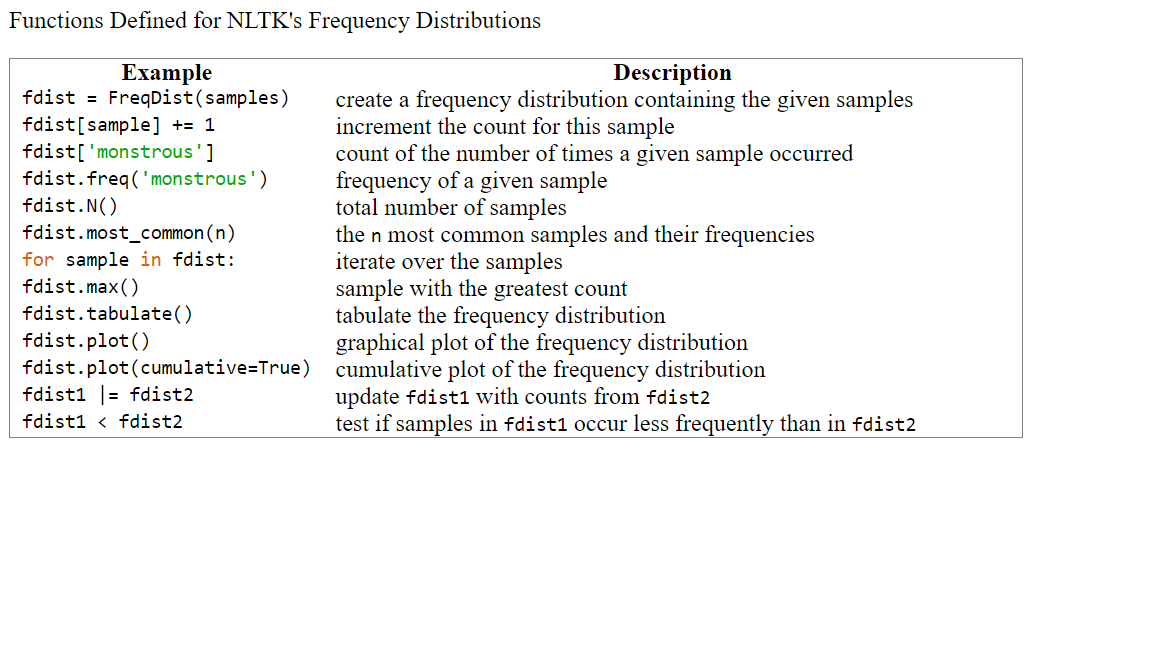

# 4   Back to Python: Making Decisions and Taking Control

So far, our little programs have had some interesting qualities: the ability to work with language, and the potential to save human effort through automation. A key feature of programming is the ability of machines to make decisions on our behalf, executing instructions when certain conditions are met, or repeatedly looping through text data until some condition is satisfied. This feature is known as control, and is the focus of this section.

# 4.1   Conditionals

Python supports a wide range of operators, such as < and >=, for testing the relationship between values. The full set of these relational operators is shown below:

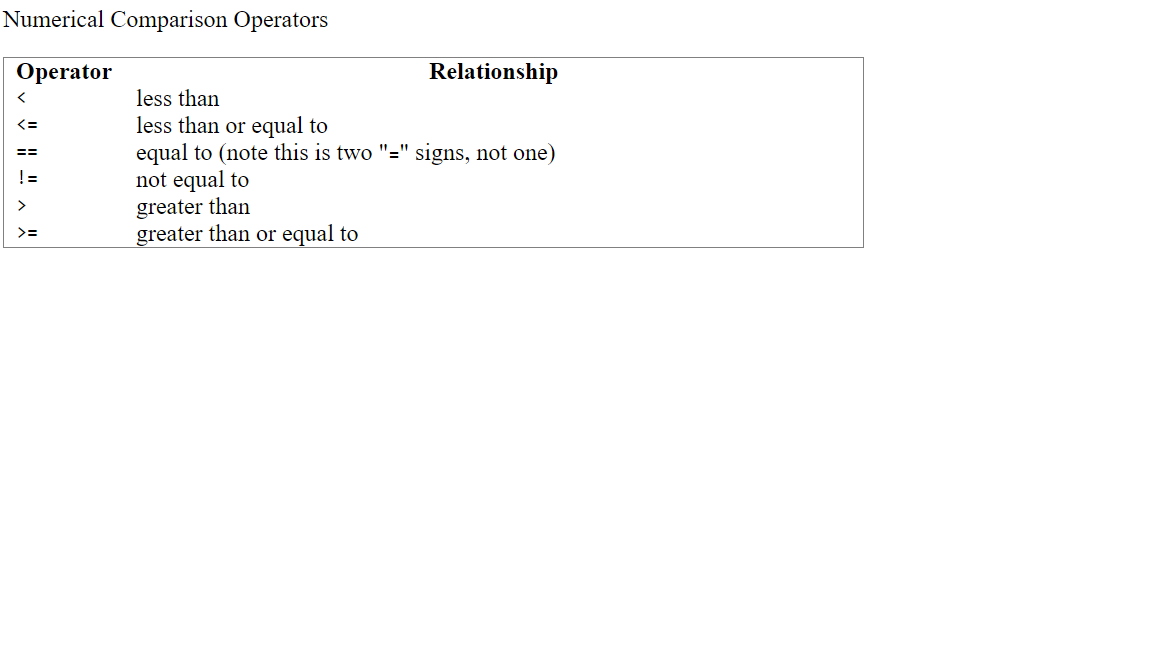

We can use these to select different words from a sentence of news text. Here are some examples — only the operator is changed from one line to the next. They all use sent7, the first sentence from text7 (Wall Street Journal). As before, if you get an error saying that sent7 is undefined, you need to first type: from nltk.book import *

In [ ]:
sent7


In [ ]:
 [w for w in sent7 if len(w) < 4]

In [ ]:
[w for w in sent7 if len(w) <= 4]


In [ ]:
[w for w in sent7 if len(w) == 4]

In [ ]:
[w for w in sent7 if len(w) != 4]

There is a common pattern to all of these examples: ***[w for w in text if condition ], where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison. However, we can also test various properties of words, using the functions listed as below:

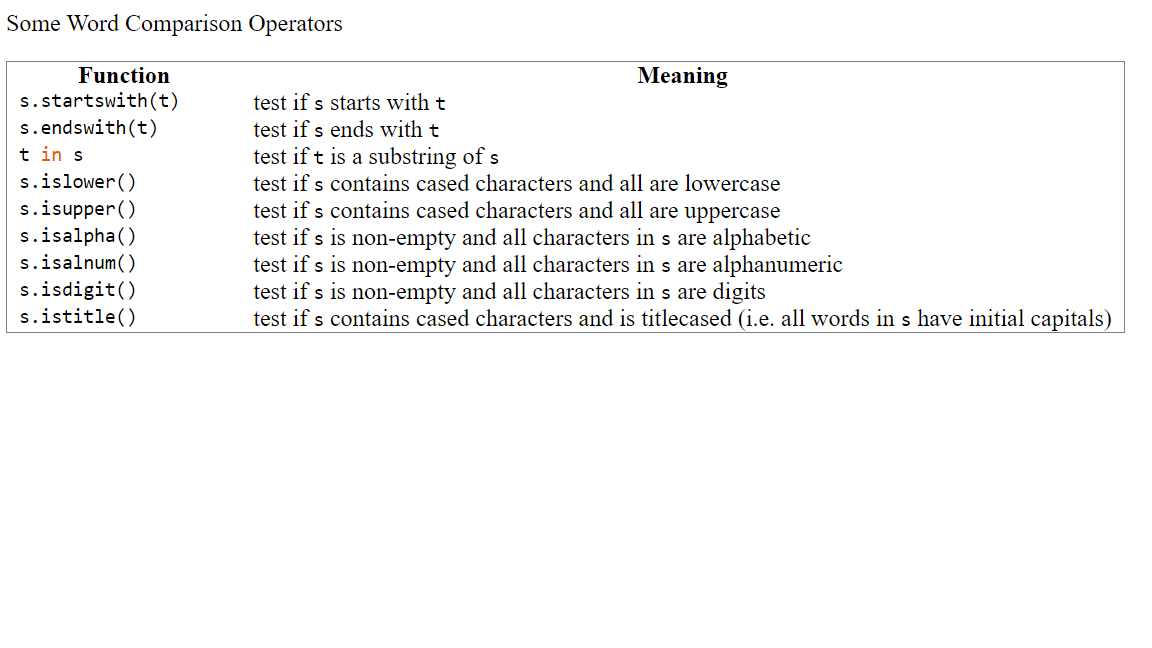

In [ ]:
sorted(w for w in set(text1) if w.endswith('ableness'))


In [ ]:
sorted(term for term in set(text4) if 'gnt' in term)

In [ ]:
sorted(item for item in set(text6) if item.istitle())


In [ ]:
sorted(item for item in set(sent7) if item.isdigit())


We can also create more complex conditions. If c is a condition, then not c is also a condition. If we have two conditions c1 and c2, then we can combine them to form a new condition using conjunction and disjunction: c1 and c2, c1 or c2.

In [ ]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)

In [ ]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

In [ ]:
 sorted(w for w in set(sent7) if not w.islower())

In [ ]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

# 4.2   Operating on Every Element

In previous examples we saw some examples of counting items other than words. Let's take a closer look at the notation we used:


These expressions have the form [f(w) for ...] or [w.f() for ...], where f is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations f(w) and w.f().

In [ ]:
[len(w) for w in text1]

In [ ]:
[w.upper() for w in text1]

Let's return to the question of vocabulary size, and apply the same idiom here:

In [ ]:
len(text1)

In [ ]:
len(set(text1))

In [ ]:
len(set(word.lower() for word in text1))

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:



In [ ]:
len(set(word.lower() for word in text1 if word.isalpha()))

# 4.3   Nested Code Blocks

Most programming languages permit us to execute a block of code when a conditional expression, or if statement, is satisfied. We already saw examples of conditional tests in code like [w for w in sent7 if len(w) < 4]. In the following program, we have created a variable called word containing the string value 'cat'. The if statement checks whether the test len(word) < 5 is true. It is, so the body of the if statement is invoked and the print statement is executed, displaying a message to the user. Remember to indent the print statement by typing four spaces.

In [ ]:
word = 'catwert'
if len(word) < 5:
    print('word length is less than 5')

If we change the conditional test to len(word) >= 5, to check that the length of word is greater than or equal to 5, then the test will no longer be true. This time, the body of the if statement will not be executed, and no message is shown to the user:

In [ ]:
if len(word) >= 5:
    print('word length is greater than or equal to 5')
    

An if statement is known as a control structure because it controls whether the code in the indented block will be run. Another control structure is the for loop. Try the following, and remember to include the colon and the four spaces:


This is called a loop because Python executes the code in circular fashion. It starts by performing the assignment word = 'Call', effectively using the word variable to name the first item of the list. Then, it displays the value of word to the user. Next, it goes back to the for statement, and performs the assignment word = 'me', before displaying this new value to the user, and so on. It continues in this fashion until every item of the list has been processed.

In [ ]:
for word in ['Call', 'me', 'Ishmael', '.']:
     print(word)

# 4.4   Looping with Conditions

Now we can combine the if and for statements. We will loop over every item of the list, and print the item only if it ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of variable names.

You will notice that if and for statements have a colon at the end of the line, before the indentation begins. In fact, all Python control structures end with a colon. The colon indicates that the current statement relates to the indented block that follows.

We can also specify an action to be taken if the condition of the if statement is not met. Here we see the elif (else if) statement, and the else statement. Notice that these also have colons before the indented code.

As you can see, even with this small amount of Python knowledge, you can start to build multiline Python programs. It's important to develop such programs in pieces, testing that each piece does what you expect before combining them into a program. This is why the Python interactive interpreter is so invaluable, and why you should get comfortable using it.

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']
for x in sent1:
    if x.endswith('l'):
        print(x)

In [ ]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
            print(token, 'is a titlecase word')
    else:
                print(token, 'is punctuation')

Finally, let's combine the idioms we've been exploring. First, we create a list of cie and cei words, then we loop over each item and print it. Notice the extra information given in the print statement: end=' '. This tells Python to print a space (not the default newline) after each word.

In [ ]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

# 5   Automatic Natural Language Understanding

In this section we describe some language understanding technologies, to give you a sense of the interesting challenges.

# 5.1   Word Sense Disambiguation


Word Sense Disambiguation (WSD) is a natural language processing (NLP) task that aims to determine the correct sense or meaning of a word within a given context. Many words in natural language have multiple senses or meanings, and WSD is the process of selecting the most appropriate sense for a word in a specific sentence or text. The goal of WSD is to address lexical ambiguity, where the same word may have different meanings depending on its context.

Key concepts and challenges in Word Sense Disambiguation include:

1. **Polysemy:** Polysemy refers to the **phenomenon where a single word has multiple related senses**. For example, the word **"bank" can mean a financial institution or the side of a river**. WSD aims to distinguish between these senses.

2. **Homonymy:** Homonymy occurs **when a word has multiple unrelated senses**. For example, the word **"bat" can mean a flying mammal or a piece of sports equipment**. WSD should disambiguate between these unrelated senses.

3. **Context:** Context plays a crucial role in WSD. **The meaning of a word can change based on the words surrounding it in a sentence or text. Understanding the context is essential for selecting the correct sense.**

4. **WordNet:** WordNet is a lexical database that **provides structured information about word meanings, synonyms, and relationships between words**. It is often used as a resource for WSD.

5. **Supervised and Unsupervised Approaches:** There are both supervised and unsupervised approaches to WSD. **Supervised methods rely on labeled training data that specifies the correct senses for words in various contexts. Unsupervised methods use corpus statistics and distributional information to perform WSD without explicit training data.

6. **Knowledge-Based Approaches:** Knowledge-based approaches to WSD use **external resources such as WordNet, semantic networks, and ontologies to disambiguate word senses**. These methods rely on structured knowledge to make sense distinctions.

7. **Machine Learning Approaches:** Machine learning techniques, including deep learning models like **neural networks**, have been applied to WSD. These models can **capture contextual information and relationships between words in large datasets.**

8. **Evaluation Metrics:** WSD systems are evaluated using metrics like **accuracy, precision, recall, and the F1-score**. Large-scale WSD evaluation tasks and competitions have been organized to assess system performance.

Applications of Word Sense Disambiguation:
- Information Retrieval: Improving search engine results by understanding the context of user queries.
- Machine Translation: Ensuring that the correct word senses are chosen during translation.
- Information Extraction: Enhancing the extraction of structured data from unstructured text.
- Question Answering: Assisting question-answering systems in providing more accurate responses.
- Sentiment Analysis: Improving sentiment analysis by considering word senses in context.

WSD is a challenging problem in NLP due to the complexity of language and context. Researchers continue to develop more accurate WSD methods to enhance the performance of various NLP applications.


In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider the ambiguous words serve and dish:
(2)	
a.		serve: help with food or drink; hold an office; put ball into play

b.		dish: plate; course of a meal; communications device


In a sentence containing the phrase: he served the dish, you can detect that both serve and dish are being used with their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china tea-set laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple fact that nearby words have closely related meanings. 

As another example of this contextual effect, consider the word by, which has several meanings, e.g.: the book by Chesterton (agentive — Chesterton was the author of the book); the cup by the stove (locative — the stove is where the cup is); and submit by Friday (temporal — Friday is the time of the submitting). Observe in (3c) that the meaning of the italicized word helps us interpret the meaning of by.

(3)		
a.		The lost children were found by the searchers (agentive)

b.		The lost children were found by the mountain (locative)

c.		The lost children were found by the afternoon (temporal)



# 5.2   Pronoun Resolution

Pronoun resolution is a crucial aspect of natural language processing (NLP) and computational linguistics that deals with the identification of the antecedent or referent of a pronoun within a given text. The goal of pronoun resolution is to determine what the pronoun (e.g., he, she, it, they) is referring to in the context, as pronouns often replace specific nouns (antecedents) mentioned earlier in the text. Accurate pronoun resolution is essential for understanding the meaning of a sentence and maintaining coherence in discourse.

Key aspects and challenges of pronoun resolution include:

1. **Pronouns and Antecedents:** Pronouns are words that replace nouns to avoid repetition in language. For instance, in the sentence "John is my friend. He is very kind," "He" is a pronoun referring to "John," the antecedent.

2. **Ambiguity:** Ambiguity in pronoun resolution arises when a pronoun could refer to multiple possible antecedents within the same context. For example, in "John told Peter that he was going to the store," "he" could refer to John or Peter.

3. **Context:** Pronoun resolution heavily relies on context. The meaning of a pronoun is often determined by the words and phrases surrounding it, both in the current sentence and in previous sentences.

4. **Knowledge and World Knowledge:** Pronoun resolution may require external knowledge about the world or domain-specific knowledge to correctly identify antecedents. For example, in "I watched the sunrise. It was beautiful," the pronoun "It" requires knowledge that sunrises can be beautiful.

5. **Anaphora and Cataphora:** Anaphoric pronouns refer to earlier-mentioned nouns (e.g., "he" referring to "John"), while cataphoric pronouns refer to nouns mentioned later in the text. Resolving cataphoric pronouns can be challenging because the antecedent appears after the pronoun.

6. **Definite and Indefinite Pronouns:** Pronoun resolution also deals with definite pronouns (e.g., "the," "this") and indefinite pronouns (e.g., "a," "an"), each with its own set of challenges.

Approaches to Pronoun Resolution:
- **Rule-Based Approaches:** These approaches use linguistic rules and syntactic patterns to identify potential antecedents and disambiguate pronouns.
- **Machine Learning Approaches:** Machine learning models, including deep learning methods, use features derived from the context to predict the antecedent of a pronoun.
- **Coreference Resolution:** Pronoun resolution is often a subset of coreference resolution, which encompasses the resolution of other types of referring expressions, such as definite descriptions and names.

Applications of Pronoun Resolution:
- Document summarization: Determining which nouns or entities pronouns refer to can help in generating coherent summaries.
- Information extraction: Recognizing pronoun references in text is important for extracting structured data.
- Machine translation: Accurate pronoun resolution is essential for maintaining the meaning of text during translation.
- Natural language understanding: Pronoun resolution contributes to the understanding of text and context in conversational AI systems.

Pronoun resolution remains an active area of research in NLP, and advances in this field have a direct impact on improving the quality of language understanding and text generation in various NLP applications.


A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following sentences in (4c), and try to determine what was sold, caught, and found (one case is ambiguous).

(4)		
a.		The thieves stole the paintings. They were subsequently sold.

b.		The thieves stole the paintings. They were subsequently caught.

c.		The thieves stole the paintings. They were subsequently found.


Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings. Computational techniques for tackling this problem include anaphora resolution — identifying what a pronoun or noun phrase refers to — and semantic role labeling — identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).

# 5.3   Generating Language Output
Generating language output refers to the process of producing human-readable text or speech based on a set of rules, models, or data inputs. This task is an essential component of natural language processing (NLP) and artificial intelligence, and it has various applications across different domains. Language generation can be performed in a wide range of contexts, **from chatbots and virtual assistants to content generation and machine translation**. Here are some key aspects of generating language output:

1. **Data Inputs:** Language generation systems take different types of data inputs, depending on the task. These inputs can include text, structured data, voice input, or a combination of these.

2. **Models and Algorithms:** Various algorithms and models are used for language generation. These may include rule-based systems, statistical models, deep learning models (e.g., recurrent neural networks and transformers), and generative adversarial networks (GANs).

3. **Tasks and Applications:**
   - **Text Generation:** This includes tasks like generating creative text, content for websites, and natural language generation (NLG) for chatbots and virtual assistants.
   - **Machine Translation:** Translating text from one language to another is a form of language generation.
   - **Speech Synthesis:** Converting text into speech is a critical component of text-to-speech (TTS) systems.
   - **Dialogue Systems:** Generating responses in conversational agents, chatbots, and virtual assistants.
   - **Captioning and Description:** Generating descriptive text for images, videos, or other content.
   - **Summarization:** Generating concise and informative summaries of longer texts.
   - **Code Generation:** Automatically generating code based on high-level programming instructions.
   - **Question Answering:** Generating answers to questions based on available information.
   - **Poetry and Creative Writing:** Generating artistic and creative text, such as poems and stories.

4. **Evaluation:** The quality of language output can be evaluated using various metrics and criteria, depending on the specific task. For example, in machine translation, metrics like BLEU and METEOR are used. For text generation tasks, human evaluations of fluency, coherence, and relevance are common.

5. **Text Generation Challenges:**
   - **Coherence:** Ensuring that generated text is logically coherent and contextually relevant.
   - **Diversity:** Generating diverse and creative output, particularly in creative writing and content generation tasks.
   - **Avoiding Bias:** Addressing biases and ensuring that generated text is fair and unbiased.
   - **Domain Adaptation:** Adapting language generation models to specific domains or topics.
   - **Scalability:** Generating text efficiently at scale, such as in content generation for large websites.

6. **Ethical Considerations:** Language generation systems need to adhere to ethical guidelines, including avoiding the spread of misinformation and maintaining user privacy.

Language generation is an active area of research and development, and it plays a central role in many AI and NLP applications. Advancements in deep learning and natural language models have significantly improved the quality and capabilities of language generation systems.


If we can automatically solve such problems of language understanding, we will be able to move on to tasks that involve generating language output, such as question answering and machine translation. In the first case, a machine should be able to answer a user's questions relating to collection of texts:

(5)		
a.		Text: ... The thieves stole the paintings. They were subsequently sold. ...

b.		Human: Who or what was sold?

c.		Machine: The paintings.


The machine's answer demonstrates that it has correctly worked out that they refers to paintings and not to thieves. In the second case, the machine should be able to translate the text into another language, accurately conveying the meaning of the original text. 

(6)		
a.		The thieves stole the paintings. They were subsequently found.

b.		Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)

c.		Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)


In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to do.

# 5.4   Machine Translation
Machine Translation (MT) is a subfield of artificial intelligence (AI) and natural language processing (NLP) that focuses on the development of computer systems and algorithms capable of automatically translating text or speech from one language to another. The goal of machine translation is to bridge the language barrier between different languages and facilitate communication and understanding across linguistic and cultural boundaries.

Key aspects and concepts related to machine translation include:

1. **Automatic Translation:** MT systems use algorithms and statistical models to automatically translate text or speech from one language (source language) to another language (target language) without human intervention.

2. **Bilingual Data:** MT systems rely on large datasets of bilingual texts, including parallel corpora, which consist of source and target language pairs. These datasets are used for training and fine-tuning machine translation models.

3. **Types of Machine Translation:**
   - **Rule-Based Machine Translation (RBMT):** RBMT relies on linguistic rules and dictionaries to perform translation. It is based on predefined grammatical and lexical rules and can be accurate but may struggle with idiomatic expressions and languages with complex syntax.
   - **Statistical Machine Translation (SMT):** SMT uses statistical models that learn translation patterns from bilingual corpora. It involves modeling translation probabilities and has been widely used in the past.
   - **Neural Machine Translation (NMT):** NMT is the most recent and successful approach. It employs artificial neural networks, particularly recurrent neural networks (RNNs) and transformers, to capture context and relationships between words in both source and target languages. NMT has significantly improved translation quality and fluency.

4. **Challenges in Machine Translation:**
   - **Ambiguity:** Languages are inherently ambiguous, and choosing the correct translation can be challenging, especially for words and phrases with multiple meanings.
   - **Context:** Understanding the context of a sentence and considering previous and subsequent sentences is crucial for accurate translation.
   - **Idiomatic Expressions:** Translating idiomatic expressions and cultural nuances accurately is a complex task.
   - **Low-Resource Languages:** Developing effective MT systems for less commonly spoken languages with limited training data is a significant challenge.



# 5.5   Spoken Dialog Systems
In the history of artificial intelligence, the chief measure of intelligence has been a linguistic one, namely the **Turing Test**: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response? In contrast, today's commercial dialogue systems are very limited, but still perform useful functions in narrowly-defined domains, as we see here:

S: How may I help you?

U: When is Baby playing?

S: For what theater?

U: The Imax theater.

S: Baby is not playing at the Imax theater, but
it's playing at the Inox theater at 3:00, 5:30, 8:00, and 10:30.

You could not ask this system to provide driving instructions or details of nearby restaurants unless the required information had already been stored and suitable question-answer pairs had been incorporated into the language processing system.

Observe that this system seems to understand the user's goals: the user asks when a movie is showing and the system correctly determines from this that the user wants to see the movie. This inference seems so obvious that you probably didn't notice it was made, yet a natural language system needs to be endowed with this capability in order to interact naturally. Without it, when asked Do you know when Baby is playing?, a system might unhelpfully respond with a cold Yes. However, the developers of commercial dialogue systems use contextual assumptions and business logic to ensure that the different ways in which a user might express requests or provide information are handled in a way that makes sense for the particular application. So, if you type When is ..., or I want to know when ..., or Can you tell me when ..., simple rules will always yield screening times. This is enough for the system to provide a useful service.


**The following figure shows simple Pipeline Architecture for a Spoken Dialogue System**: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process.

**Dialogue systems give us an opportunity to mention the commonly assumed pipeline for NLP. Following figure shows the architecture of a simple dialogue system. Along the top of the diagram, moving from left to right, is a "pipeline" of some language understanding components. These map from speech input via syntactic parsing to some kind of meaning representation. Along the middle, moving from right to left, is the reverse pipeline of components for converting concepts to speech. These components make up the dynamic aspects of the system. At the bottom of the diagram are some representative bodies of static information: the repositories of language-related data that the processing components draw on to do their work.**

1) **Phonology** is a subfield of linguistics that **focuses on the study of the sounds used in language, their patterns, and how they function in the languages of the world.** 

2) **Morphology** is a subfield of linguistics that **deals with the structure and formation of words in a language.**

3) **Syntax** is the study of the **structure and rules governing the arrangement of words and phrases to create well-formed sentences in a language.**

4) **Semantics** is the study of **meaning in language, encompassing how words, phrases, and sentences convey meaning and relate to the real world.**

5) **Reasoning** is the **cognitive process of drawing conclusions, making inferences, and applying logic to understand and solve problems.**

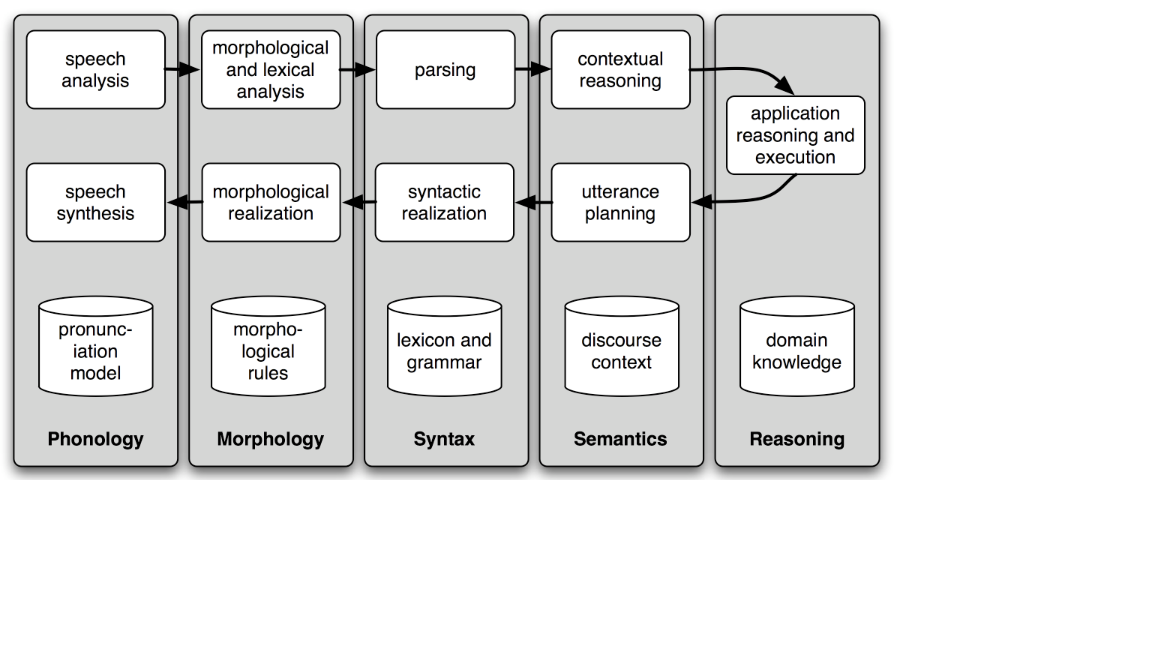

# 5.6   Textual Entailment


Textual Entailment, often referred to as Recognizing Textual Entailment (RTE), is a natural language processing (NLP) task that focuses on **determining whether a given natural language text (the "hypothesis") can be logically inferred or entailed from another text (the "text" or "premise"). The primary objective is to assess the relationship between the two texts and classify it as either "entailment," "contradiction," or "unknown."

Key aspects and concepts related to Textual Entailment include:

1. **Textual Relationship:**
   - **Entailment:** If the meaning of the hypothesis can be logically derived or inferred from the text, the relationship is classified as "entailment." This implies that the information in the hypothesis is supported by the information in the text.
   - **Contradiction:** If the hypothesis directly contradicts or is inconsistent with the information in the text, the relationship is classified as "contradiction."
   - **Unknown:** If it is impossible to determine whether the hypothesis is entailed by the text or contradicted by it, the relationship is labeled as "unknown." This often occurs when there is insufficient information or ambiguity in the text.

2. **Applications:**
   - Textual Entailment has practical applications in various NLP tasks, including:
   - **Question Answering**: Determining whether the answer to a question can be inferred from a given text.
   - **Information Retrieval**: Assessing the relevance of documents or passages to a user's query.
   - **Text Summarization**: Identifying whether a summary captures the essential information from the source text.
   - **Machine Translation**: Verifying whether a translation accurately conveys the meaning of the source text.
   - **Paraphrase Detection**: Recognizing when two texts express the same meaning differently.

3. **Evaluation Metrics:** Textual Entailment systems are evaluated using various metrics, including accuracy, precision, recall, and the F1-score.

4. **Deep Learning Models:** Many Textual Entailment systems, particularly neural network-based models, have made significant progress in recent years. Models like BERT (Bidirectional Encoder Representations from Transformers) and RoBERTa have achieved state-of-the-art results in textual entailment tasks.

5. **Cross-Linguistic Challenges:** Handling textual entailment in multilingual contexts and across languages presents additional complexities due to language-specific nuances and variations in expression.